In [1]:
import yfinance as yf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
#plt.style.use("classic")
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import numpy as np



import warnings
warnings.filterwarnings("ignore")


###
1. extracting stock from yf (tickers, start="2024-01-01", end="2024-12-08", interval="1d",period="1mo")
2. calculate min, max,np.mean,pd.quantile(0.25)
   diff::Calculate the change between neighboring rows
   pct_change:Calculate the percentage change between neighboring rows
   
3. How much does $1 on the first day equate to on the last day, holding yield
4. long and short-term moving average, gold and death cross

In [4]:
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA"]
ticker = yf.Ticker("AAPL")
df = ticker.history(period="1mo", interval="1d")  # 获取当天的每分钟数据
df.head(20)
#df.plot(figsize=(12,12),subplots = True)

YFRateLimitError: Too Many Requests. Rate limited. Try after a while.

In [5]:
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA"]
# 批量下载股票数据
data = yf.download(tickers, start="2024-01-01", end="2024-12-27", interval="1d")

# 提取收盘价数据
close_prices = data['Close']
close_prices.head()

#df.index = pd.to_datetime(df.index, errors='coerce')

[*********************100%%**********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2024-01-02,185.639999,149.929993,138.169998,370.869995,248.419998
2024-01-03,184.250000,148.470001,138.919998,370.600006,238.449997
2024-01-04,181.910004,144.570007,136.389999,367.940002,237.929993
2024-01-05,181.179993,145.240005,135.729996,367.750000,237.490005
2024-01-08,185.559998,149.100006,138.839996,374.690002,240.449997


In [15]:
close_prices.info()
close_prices.describe().round(2)
#close_prices.aggregate([min, max,np.mean,pd.quantile(0.25)])

#close_prices.diff().head()
#每天的增长率
close_prices.pct_change().head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 236 entries, 2024-01-02 to 2024-12-06
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    236 non-null    float64
 1   AMZN    236 non-null    float64
 2   GOOGL   236 non-null    float64
 3   MSFT    236 non-null    float64
 4   TSLA    236 non-null    float64
dtypes: float64(5)
memory usage: 11.1 KB


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2024-01-02,NaN,NaN,NaN,NaN,NaN
2024-01-03,-0.007488,-0.009738,0.005428,-0.000728,-0.040134
2024-01-04,-0.012700,-0.026268,-0.018212,-0.007178,-0.002181
2024-01-05,-0.004013,0.004634,-0.004839,-0.000516,-0.001849
2024-01-08,0.024175,0.026577,0.022913,0.018872,0.012464


In [18]:
#每天的增长率
close_prices.pct_change().mean().plot(kind="bar",figsize = (10,6))


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2024-01-02,-0.007488,-0.009738,0.005428,-0.000728,-0.040134
2024-01-03,-0.012700,-0.026268,-0.018212,-0.007178,-0.002181
2024-01-04,-0.004013,0.004634,-0.004839,-0.000516,-0.001849
2024-01-05,0.024175,0.026577,0.022913,0.018872,0.012464
2024-01-08,-0.002263,0.015225,0.015197,0.002936,-0.022832


<Axes: xlabel='Date'>

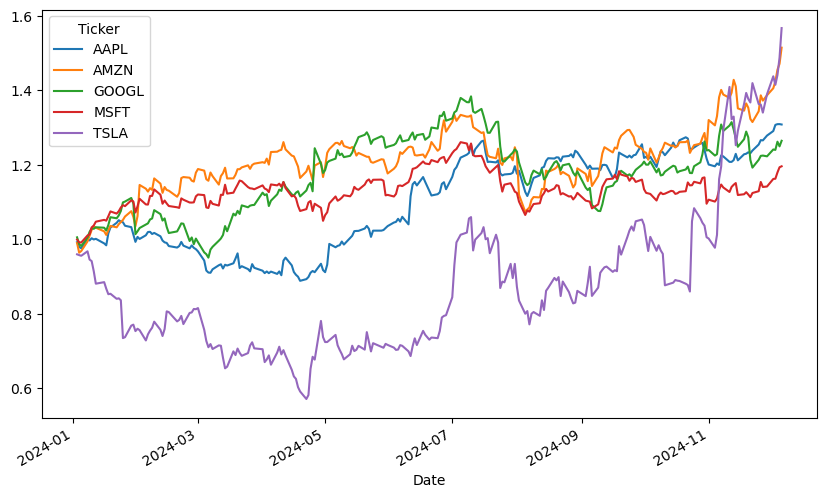

In [24]:
#How much does $1 on the first day equate to on the last day
ccon_change = np.log(close_prices/close_prices.shift(1))
ccon_change.head().round(3)
#restore
ccon_change.cumsum().apply(np.exp).plot(figsize=(10,6))

In [27]:
#close_prices.resample("1w").last().head()
close_prices.resample("1w",label = "right").last().head()

C:\Users\602599140\AppData\Local\Temp\ipykernel_8664\3254796966.py:1: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  close_prices.resample("1w").last().head()
C:\Users\602599140\AppData\Local\Temp\ipykernel_8664\3254796966.py:2: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  close_prices.resample("1w",label = "right").last().head()


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2024-01-07,181.179993,145.240005,135.729996,367.750000,237.490005
2024-01-14,185.919998,154.619995,142.649994,388.470001,218.889999
2024-01-21,191.559998,155.339996,146.380005,398.670013,212.190002
2024-01-28,192.419998,159.119995,152.190002,403.929993,183.250000
2024-02-04,185.850006,171.809998,142.380005,411.220001,187.910004


In [3]:
＃df = close_prices.dropna()
#10天为窗口滑动
windows = 10

df["AAPL"].rolling(window = windows).mean()

Date
2024-01-02           NaN
2024-01-03           NaN
2024-01-04           NaN
2024-01-05           NaN
2024-01-08           NaN
                 ...    
2024-12-02    232.346999
2024-12-03    233.809998
2024-12-04    235.282997
2024-12-05    236.686996
2024-12-06    238.118996
Name: AAPL, Length: 236, dtype: float64

In [4]:
#短均和长均
df = close_prices

df["20d"] = df["AAPL"].rolling(window = 20).mean()
df["60d"] = df["AAPL"].rolling(window = 60).mean()


C:\Users\602599140\AppData\Local\Temp\ipykernel_14072\2286771958.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["20d"] = df["AAPL"].rolling(window = 20).mean()
C:\Users\602599140\AppData\Local\Temp\ipykernel_14072\2286771958.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60d"] = df["AAPL"].rolling(window = 60).mean()


In [5]:
#death cross and gold cross
df["avg_jud"]= np.where(df["20d"]>df["60d"],1,-1)
df.head()

C:\Users\602599140\AppData\Local\Temp\ipykernel_14072\1124018969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["avg_jud"]= np.where(df["20d"]>df["60d"],1,-1)


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA,20d,60d,avg_jud
Date,,,,,,,,
2024-01-02,185.639999,149.929993,138.169998,370.869995,248.419998,NaN,NaN,-1
2024-01-03,184.250000,148.470001,138.919998,370.600006,238.449997,NaN,NaN,-1
2024-01-04,181.910004,144.570007,136.389999,367.940002,237.929993,NaN,NaN,-1
2024-01-05,181.179993,145.240005,135.729996,367.750000,237.490005,NaN,NaN,-1
2024-01-08,185.559998,149.100006,138.839996,374.690002,240.449997,NaN,NaN,-1


<Axes: xlabel='Date'>

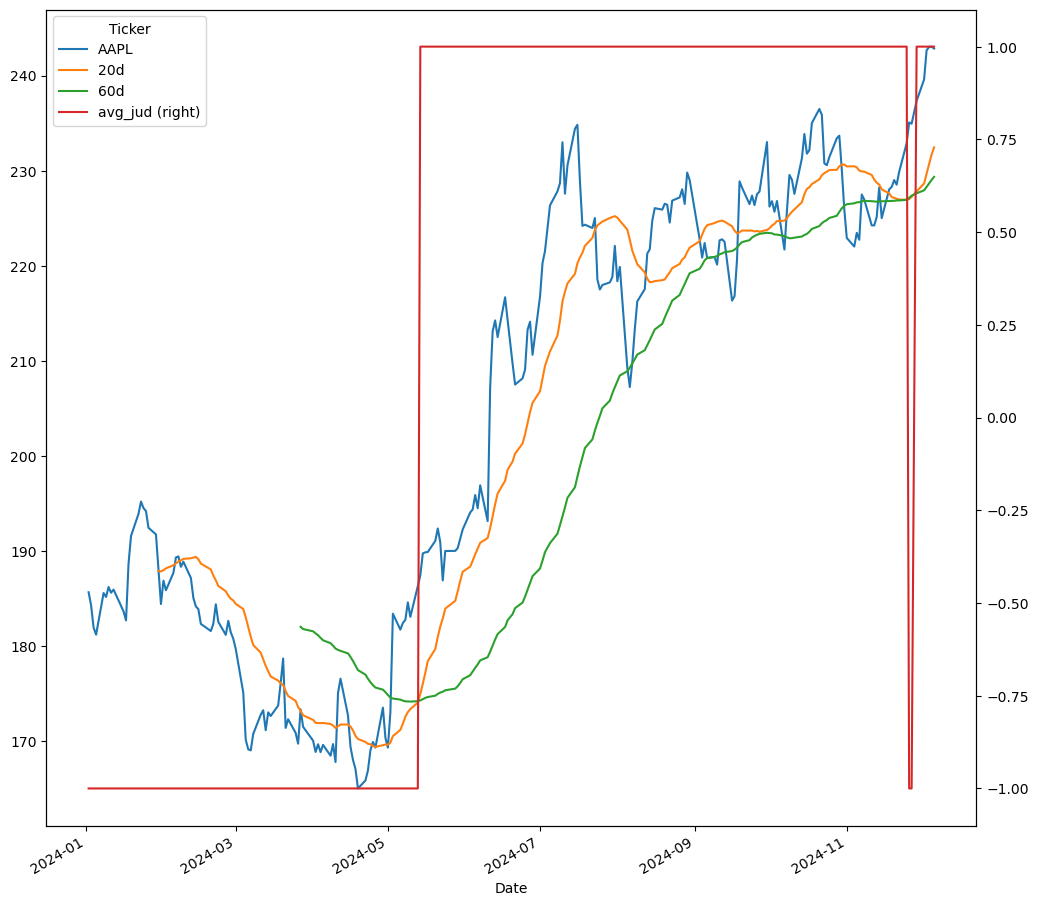

In [6]:
df[["AAPL","20d","60d"]].tail()
#df[["AAPL","20d","60d"]].plot(figsize= (12,12))
df[["AAPL","20d","60d","avg_jud"]].plot(figsize= (12,12),secondary_y = "avg_jud")

###
1. seeking relationship between two index
2. visualization
3. regression and Correlation coefficient
4. computing the change of correlation with years

In [25]:
tickers = ["^GSPC", "^VIX"]
# 批量下载股票数据
data = yf.download(tickers, start="2015-01-01", end="2024-12-08", interval="1d")

# 提取收盘价数据
df_c = data['Close']
df_c.columns = ["SPY","VIX"]
df_c.head()

[*********************100%%**********************]  2 of 2 completed


,SPY,VIX
Date,,
2015-01-02,2058.199951,17.790001
2015-01-05,2020.579956,19.920000
2015-01-06,2002.609985,21.120001
2015-01-07,2025.900024,19.309999
2015-01-08,2062.139893,17.010000


<Axes: xlabel='Date'>

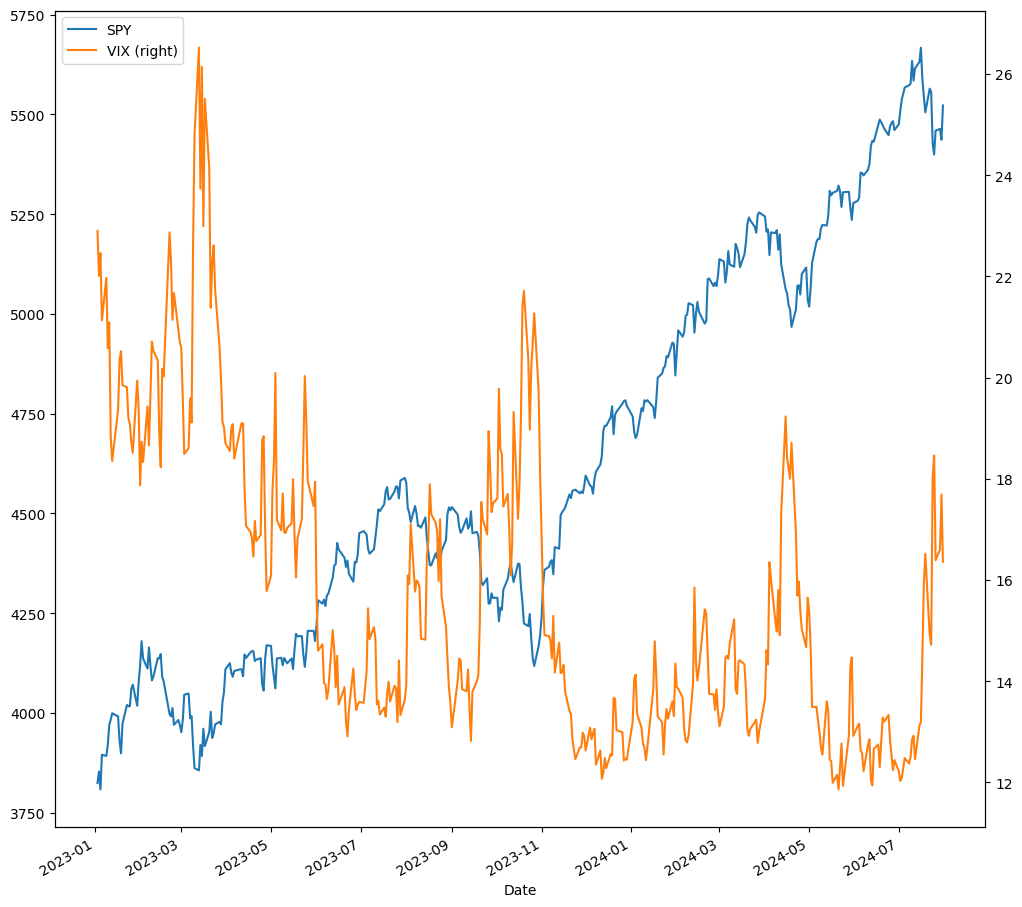

In [17]:
#visualization of relationship
df_c.loc[:'2024-07-31'].plot(figsize= (12,12),secondary_y = "VIX")

array([[<Axes: xlabel='SPY', ylabel='SPY'>,
        <Axes: xlabel='VIX', ylabel='SPY'>],
       [<Axes: xlabel='SPY', ylabel='VIX'>,
        <Axes: xlabel='VIX', ylabel='VIX'>]], dtype=object)

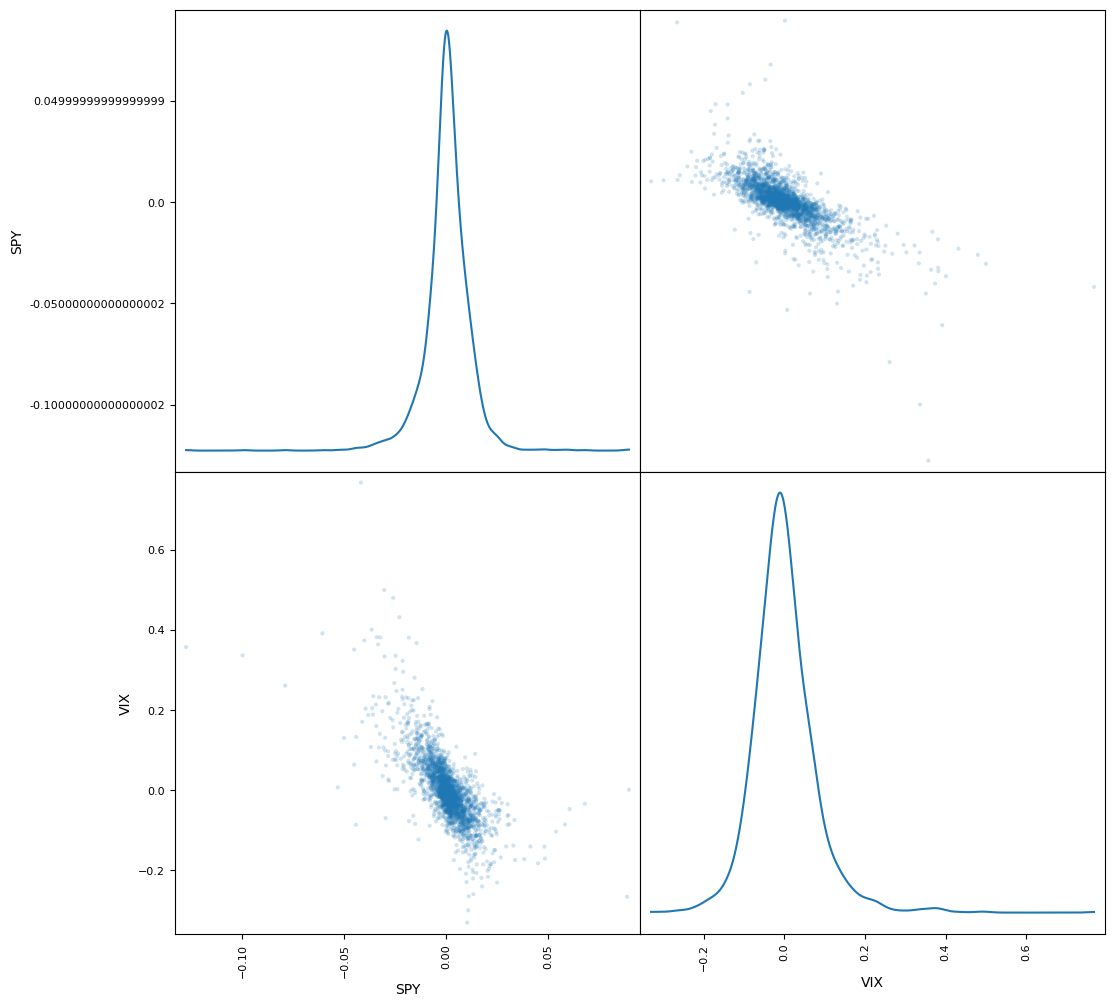

In [26]:
#to show negative relationship
grow_rate = np.log(df_c/df_c.shift(1))
grow_rate.dropna(inplace = True)
pd.plotting.scatter_matrix(grow_rate,
                           alpha = 0.2,
                           #diagonal = 'hist',
                           #hist_kwds = {'bins':50},
                           diagonal = 'kde',
                           figsize = (12,12)
                          )

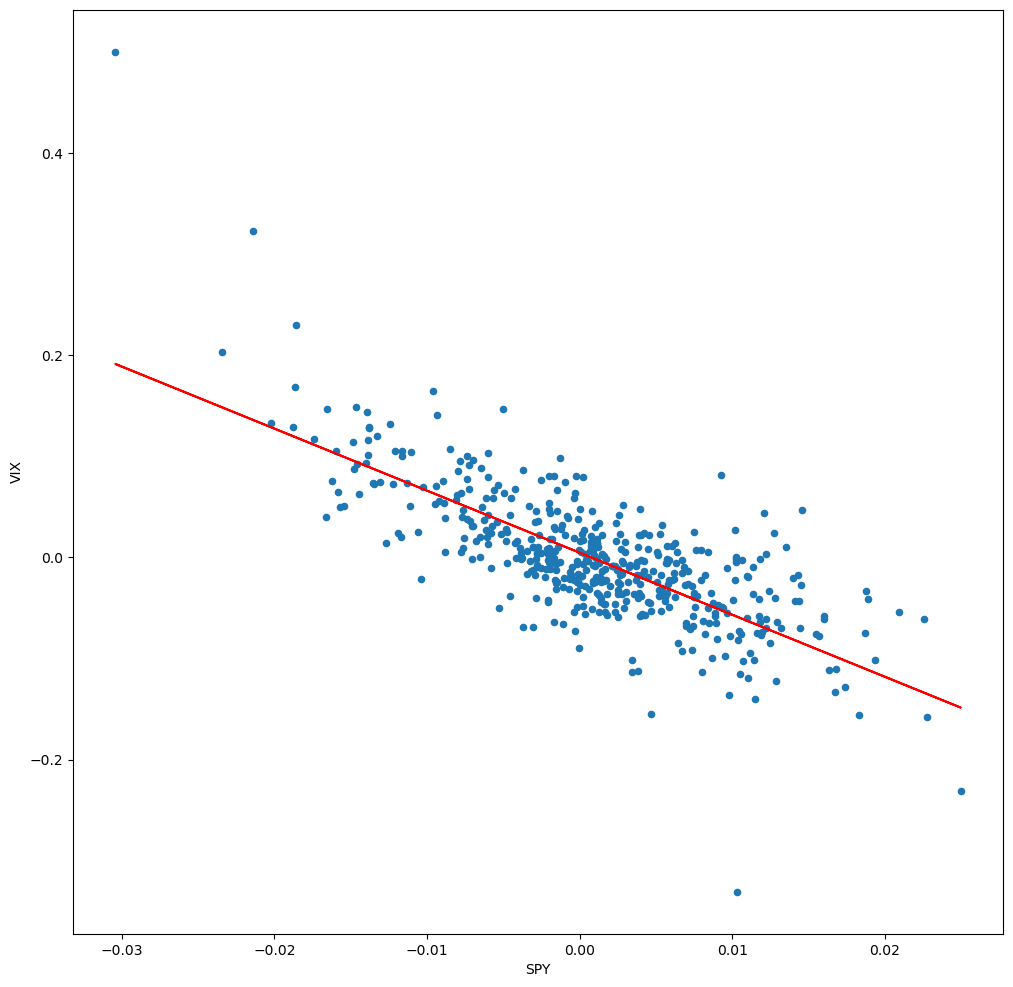

In [21]:
#built regression model para: x,y, deg:set exponent
#corelationship coefficient
regression = np.polyfit(grow_rate['SPY'],grow_rate['VIX'],deg= 1)
#grow_rate.corr()
plo = grow_rate.plot(kind='scatter',x = 'SPY',y = 'VIX',figsize = (12,12))
plo.plot(grow_rate['SPY'],np.polyval(regression,grow_rate['SPY']),'r')

<Axes: xlabel='Date'>

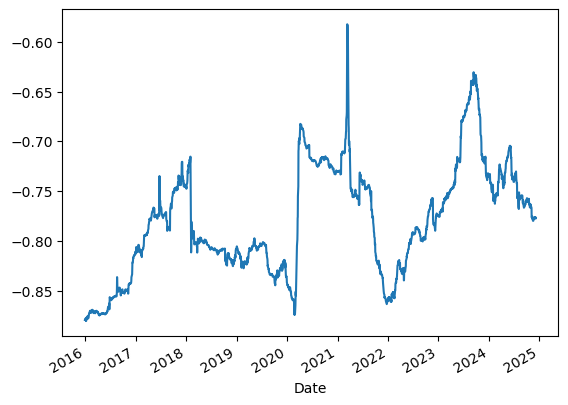

In [27]:
# computing change
grow_rate['SPY'].rolling(window = 250).corr(grow_rate['VIX']).plot()

*******TWO MA strategy*******
1. preprocessing: remove NA, check outlier
2. determining short and long
3. Execute the strategy and calculate the return

In [6]:
#preprocessing
df = close_prices[['AAPL']].dropna()

<Axes: xlabel='Date'>

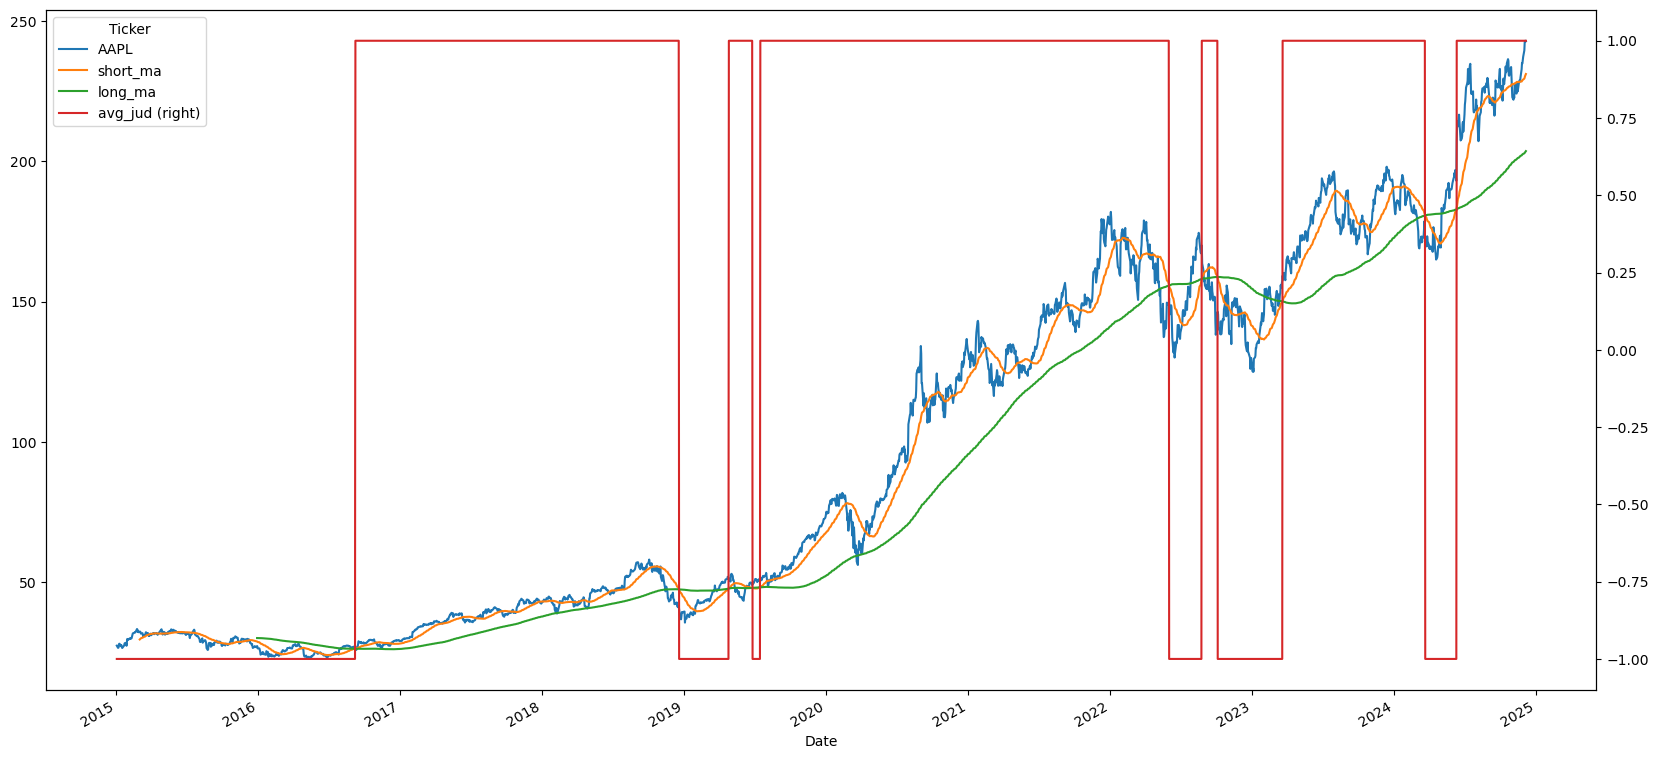

In [52]:
short_ma =40
long_ma = 250
df["short_ma"]=df['AAPL'].rolling(short_ma).mean()
df["long_ma"]=df['AAPL'].rolling(long_ma).mean()
df["avg_jud"]= np.where(df["short_ma"]>df["long_ma"],1,-1)
df[["AAPL","short_ma","long_ma","avg_jud"]].plot(figsize= (20,10),secondary_y = "avg_jud")

In [8]:
#non-strategic and strategic return
df["returns"] = np.log(df['AAPL']/df['AAPL'].shift(1))
df["st_returns"] = df['avg_jud'].shift(1)*df["returns"]
df.dropna(inplace=True)
np.exp(df[['returns','st_returns']].sum())

Ticker
returns       3.625780
st_returns    4.024199
dtype: float64

In [57]:
#Adjust parameters
from itertools import product
df = close_prices[['AAPL']].dropna()
short_ma = [20,40,60,80]
long_ma = [150,200,250,280]
res = pd.DataFrame(columns=["short_ma", "long_ma", "returns", "st_returns", "performance"])

# Traverse all combinations of (short_ma, long_ma) parameters.
for ma1, ma2 in product(short_ma, long_ma):
    if ma1 >= ma2:
        continue
    df_temp = df.copy()

    df_temp["returns"] = np.log(df_temp['AAPL'] / df_temp['AAPL'].shift(1))
    df_temp["short_ma"] = df_temp['AAPL'].rolling(ma1).mean()
    df_temp["long_ma"] = df_temp['AAPL'].rolling(ma2).mean()
    df_temp.dropna(inplace=True)
    df_temp["avg_jud"] = np.where(df_temp["short_ma"] > df_temp["long_ma"], 1, -1)
    df_temp["st_returns"] = df_temp["avg_jud"].shift(1) * df_temp["returns"]
    df_temp.dropna(inplace=True)
    performance = np.exp(df_temp[['returns', 'st_returns']].sum())

    res = pd.concat([res, pd.DataFrame({
        'short_ma': [ma1],
        'long_ma': [ma2],
        'returns': [performance['returns']],
        'st_returns': [performance['st_returns']],
        'performance': [performance['st_returns'] - performance['returns']]
    })], ignore_index=True)
print('over')

over


*******Strategy Evaluation Metrics*******
1.Annualized Return

In [6]:
df = close_prices[['AAPL']].dropna()
df_new = df/df.iloc[0]
#df_new.plot(figsize=(12,6))
returns = df_new.iloc[-1]-1
#a_return = (df.fillna(method= 'pad')).apply(lambda x:x/x.shift(1)-1)[1:]
a_return = pd.DataFrame(returns.values,columns= ['returns'],index= returns.index)

months = 12
a_return['annual_returns'] = ((1 + a_return['returns']) ** (12 / months) - 1)
v

,returns,annual_returns
Ticker,,
AAPL,0.395281,0.395281


*******Strategy Evaluation Metrics*******
2.Maximum Drawdown

In [31]:
df_md = df['2023-01-01':'2023-12-30']
df_md["Peak"] = df_md["AAPL"].cummax()
df_md['Drawdown'] = (df_md['AAPL']- df_md["Peak"])/df_md["Peak"]
max_drawdown = df_md['Drawdown'].min()
print("max drawdown:",max_drawdown)
print("occur in:",df_md['Drawdown'].idxmin())

max drawdown: -0.15047084763448376
occur in: 2023-10-26 00:00:00


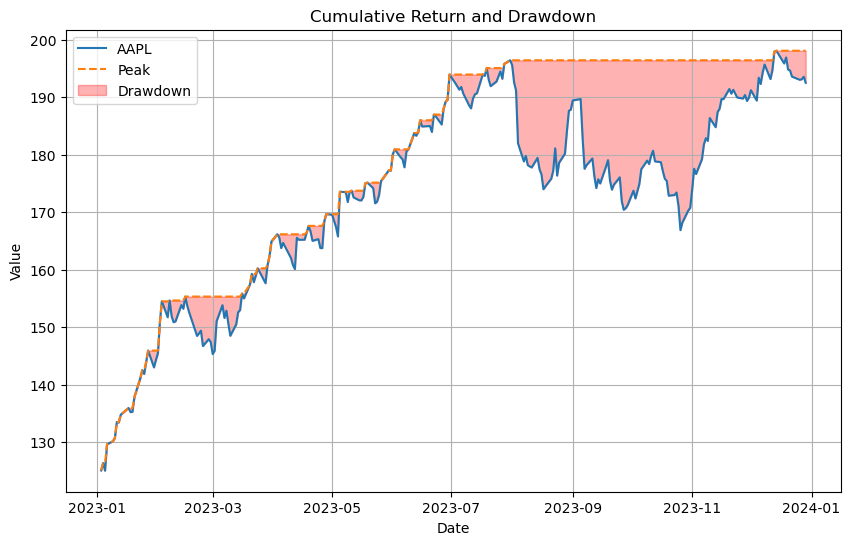

In [32]:
#drawdown curve
plt.figure(figsize=(10, 6))
plt.plot(df_md.index, df_md["AAPL"], label="AAPL")
plt.plot(df_md.index, df_md["Peak"], label="Peak", linestyle="--")
plt.fill_between(df_md.index, df_md["AAPL"], df_md["Peak"], color="red", alpha=0.3, label="Drawdown")
plt.title("Cumulative Return and Drawdown")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

*******Strategy Evaluation Metrics*******
3.Sharpe Ratio

In [ ]:
df = close_prices[['AAPL']].dropna()

In [7]:
# Get the US 10-year Treasury yield  (^TNX)
ticker = "^TNX"
ten_year_yield = yf.Ticker(ticker)
historical_data = ten_year_yield.history(start="2024-01-01", end="2024-12-27")

# computing risk free yield (R_f)
historical_data["Yield"] = historical_data["Close"] / 10  
risk_free_rate = historical_data["Yield"].mean() / 100
risk_free_rate

0.00420265461737851

*****Annualized Volatility*****
Assume that daily return fluctuations are independent and identically distributed.
The total volatility of cumulative returns increases with time, but the rate of increase is the square root of time.

In [9]:
#Annualized Volatility
df["Log Return"] = np.log(df["AAPL"] / df["AAPL"].shift(1))
df = df.dropna()
# Calculate the standard deviation of daily returns
daily_std = df["Log Return"].std()

# 4. Annualized Volatility
a_return["annual_volatility"] = daily_std * np.sqrt(252)

In [10]:

# Sharpe Ratio
a_return["sharpe_ratio"] = (a_return["annual_returns"] - risk_free_rate) / a_return["annual_volatility"]
a_return

,returns,annual_returns,annual_volatility,sharpe_ratio
Ticker,,,,
AAPL,0.395281,0.395281,0.223487,1.749894


In [13]:
# 年份列表
years = [2025, 2024, 2023, 2022]

# 存储各年数据的列表
dfs = []

for year in years:
    # 构建带年份过滤的 URL
    url = (
        "https://home.treasury.gov/resource-center/data-chart-center/"
        "interest-rates/TextView"
        f"?type=daily_treasury_yield_curve&field_tdr_date_value={year}"
    )
    resp = requests.get(url)
    resp.raise_for_status()
    soup = BeautifulSoup(resp.text, "html.parser")
    table = soup.find("table")
    
    # 提取表头
    headers = [th.get_text(strip=True) for th in table.find_all("th")]
    # 提取行
    rows = []
    for tr in table.find_all("tr")[1:]:
        cells = [td.get_text(strip=True) for td in tr.find_all("td")]
        if cells:
            rows.append(cells)
    
    # 转为 DataFrame
    df_year = pd.DataFrame(rows, columns=headers)
    df_year["Date"] = pd.to_datetime(df_year["Date"])
    df_year.set_index("Date", inplace=True)
    
    dfs.append(df_year)

# 合并所有年份的数据
df_all = pd.concat(dfs).sort_index()

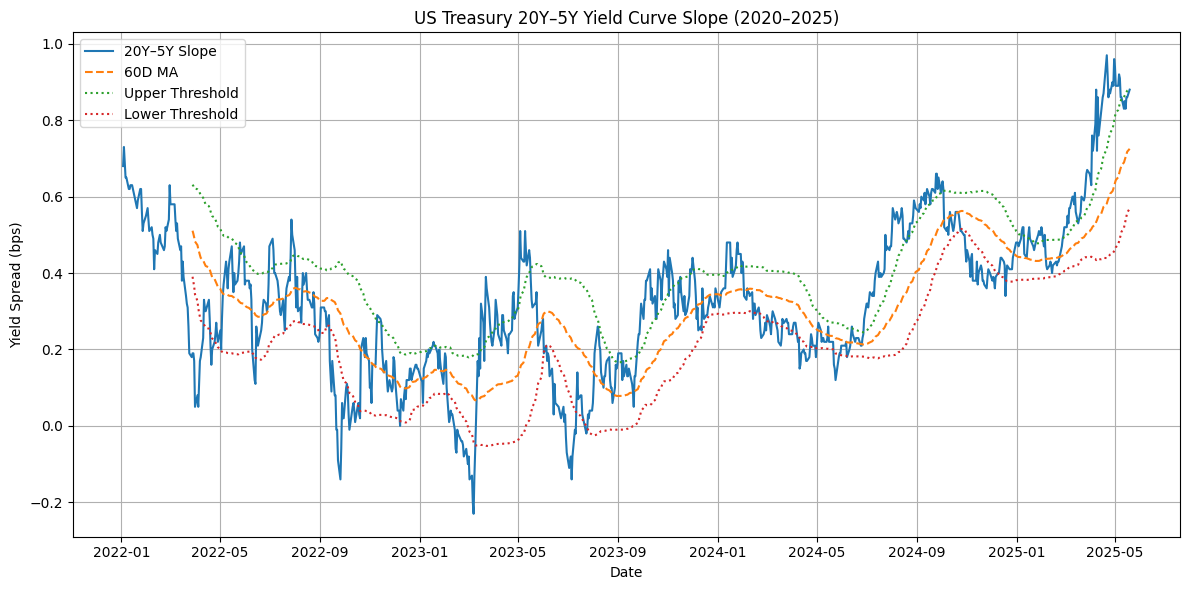

              Y5   Y20  Slope        MA     Upper     Lower  Signal
Date                                                               
2025-05-06  3.90  4.82   0.92  0.659500  0.836158  0.482842       1
2025-05-07  3.87  4.78   0.91  0.667667  0.844392  0.490942       1
2025-05-08  4.00  4.86   0.86  0.674833  0.850473  0.499194       1
2025-05-09  4.00  4.86   0.86  0.682167  0.856163  0.508170       1
2025-05-12  4.09  4.92   0.83  0.689333  0.860341  0.518326       0
2025-05-13  4.12  4.97   0.85  0.696500  0.865021  0.527979       0
2025-05-14  4.17  5.00   0.83  0.703167  0.868855  0.537479       0
2025-05-15  4.07  4.93   0.86  0.710500  0.873152  0.547848       0
2025-05-16  4.06  4.92   0.86  0.717667  0.877193  0.558140       0
2025-05-19  4.07  4.95   0.88  0.725167  0.881485  0.568848       0


In [20]:
# 提取并转换 5Y 和 20Y 列
df = df_all.rename(columns={'5 Yr': 'Y5', '20 Yr': 'Y20'})
df[['Y5', 'Y20']] = df[['Y5', 'Y20']].apply(pd.to_numeric, errors='coerce')
df = df.dropna(subset=['Y5', 'Y20'])

# 计算 20Y-5Y 利差
df['Slope'] = df['Y20'] - df['Y5']

# 计算 60 日滚动均值和标准差，构建阈值
window = 60
df['MA'] = df['Slope'].rolling(window).mean()
df['STD'] = df['Slope'].rolling(window).std()
k = 1.0
df['Upper'] = df['MA'] + k * df['STD']
df['Lower'] = df['MA'] - k * df['STD']

# 生成交易信号
df['Signal'] = 0
df.loc[df['Slope'] > df['Upper'], 'Signal'] = 1
df.loc[df['Slope'] < df['Lower'], 'Signal'] = -1

# 可视化
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Slope'], label='20Y–5Y Slope')
plt.plot(df.index, df['MA'], linestyle='--', label='60D MA')
plt.plot(df.index, df['Upper'], linestyle=':', label='Upper Threshold')
plt.plot(df.index, df['Lower'], linestyle=':', label='Lower Threshold')
plt.title('US Treasury 20Y–5Y Yield Curve Slope (2020–2025)')
plt.xlabel('Date')
plt.ylabel('Yield Spread (bps)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 打印最近 10 条信号
print(df[['Y5', 'Y20', 'Slope', 'MA', 'Upper', 'Lower', 'Signal']].tail(10))

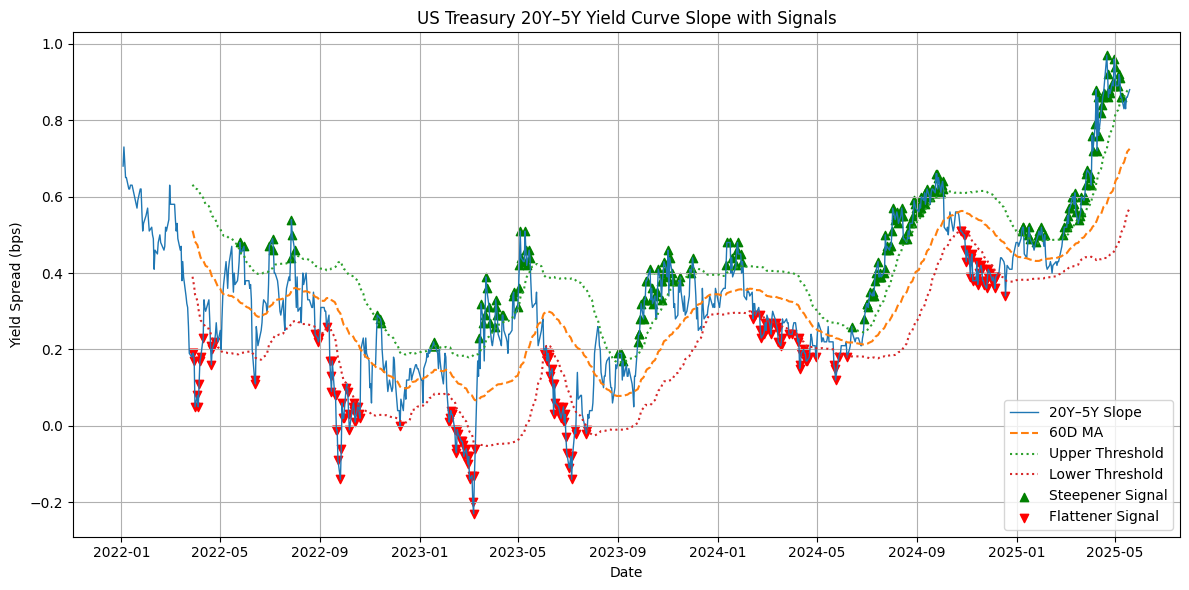

In [ ]:
# 提取并转换 5Y 和 20Y 列
df = df_all.rename(columns={'5 Yr': 'Y5', '20 Yr': 'Y20'})
df[['Y5', 'Y20']] = df[['Y5', 'Y20']].apply(pd.to_numeric, errors='coerce')
df = df.dropna(subset=['Y5', 'Y20'])

# 计算 20Y-5Y 利差
df['Slope'] = df['Y20'] - df['Y5']
# 4. 计算滚动统计和信号
window = 60
df['MA'] = df['Slope'].rolling(window).mean()
df['STD'] = df['Slope'].rolling(window).std()
k = 1.0
df['Upper'] = df['MA'] + k * df['STD']
df['Lower'] = df['MA'] - k * df['STD']
df['Signal'] = 0
df.loc[df['Slope'] > df['Upper'], 'Signal'] = 1
df.loc[df['Slope'] < df['Lower'], 'Signal'] = -1

# 5. 可视化并标记信号
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Slope'], label='20Y–5Y Slope', linewidth=1)
plt.plot(df.index, df['MA'], linestyle='--', label='60D MA')
plt.plot(df.index, df['Upper'], linestyle=':', label='Upper Threshold')
plt.plot(df.index, df['Lower'], linestyle=':', label='Lower Threshold')

# 标记Signal为1的点（Steepener）和Signal为-1的点（Flattener）
steep_dates = df[df['Signal'] == 1].index
flat_dates = df[df['Signal'] == -1].index
plt.scatter(steep_dates, df.loc[steep_dates, 'Slope'], marker='^', color='green', label='Steepener Signal')
plt.scatter(flat_dates, df.loc[flat_dates, 'Slope'], marker='v', color='red', label='Flattener Signal')

plt.title('US Treasury 20Y–5Y Yield Curve Slope with Signals')
plt.xlabel('Date')
plt.ylabel('Yield Spread (bps)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [2]:
# 1. 定义ETF代码和各自的久期（年）
tickers = {
    "2856.T": 5.0,   # 3–7年ETF，久期约5年
    "2621.T": 8.0    # 7–10年ETF，久期约8年
}

# 2. 获取历史价格数据
start_date = "2025-01-01"
end_date = "2025-05-20"
data = yf.download(list(tickers.keys()), start=start_date, end=end_date)["Adj Close"]

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 2 completed

2 Failed downloads:
['2856.T', '2621.T']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
[*********************100%***********************]  1 of 2 completed

Ticker,2621.T,2856.T
Date,,


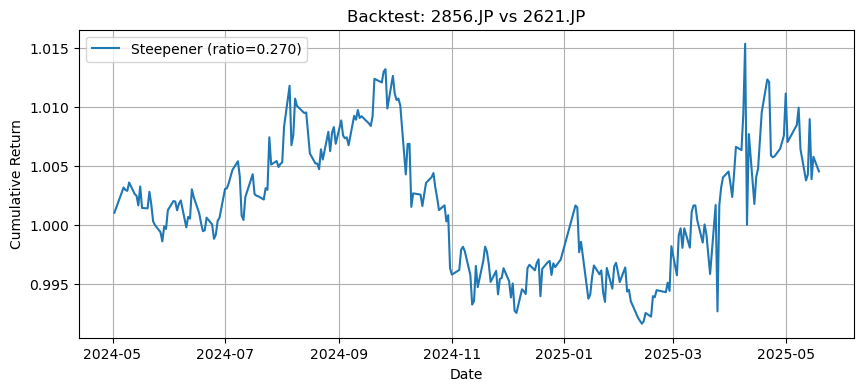

Total Return: 0.45%
Annualized Return: 0.75%


In [8]:
from io import StringIO
# 1. 定义ETF代码和久期（年）
tickers = {"2856.JP": 4.3, "2621.JP": 15.90}
start_date = "20240501"
end_date   = "20250520"

# 2. 获取 Stooq 数据函数，带重试
def fetch_stooq(symbol):
    url = f"https://stooq.com/q/d/l/?s={symbol.lower()}&d1={start_date}&d2={end_date}&i=d"
    for i in range(5):
        resp = requests.get(url)
        if resp.status_code == 200 and "Date" in resp.text:
            df = pd.read_csv(StringIO(resp.text), parse_dates=["Date"], index_col="Date")
            return df["Close"].sort_index()
        time.sleep(2**i)
    raise Exception(f"Failed to fetch {symbol}")


# 3. 批量下载并合并
prices = pd.DataFrame({sym: fetch_stooq(sym) for sym in tickers})
prices = prices.dropna()

# 4. 计算日度收益率
rets = prices.pct_change().dropna()

# 5. 计算对冲比例
D_s = tickers["2856.JP"]
D_l = tickers["2621.JP"]
hedge_ratio = D_s / D_l

# 6. 构建 Steepener 策略收益：多 2856、空 2621
strategy_rets = rets["2856.JP"] - hedge_ratio * rets["2621.JP"]
cum_returns = (1 + strategy_rets).cumprod()

# 7. 绘制累积收益曲线
plt.figure(figsize=(10,4))
plt.plot(cum_returns, label=f"Steepener (ratio={hedge_ratio:.3f})")
plt.title("Backtest: 2856.JP vs 2621.JP")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.show()

# 8. 输出绩效
total = cum_returns.iloc[-1] - 1
annual = cum_returns.resample("Y").last().pct_change().mean()
print(f"Total Return: {total:.2%}")
print(f"Annualized Return: {annual:.2%}")


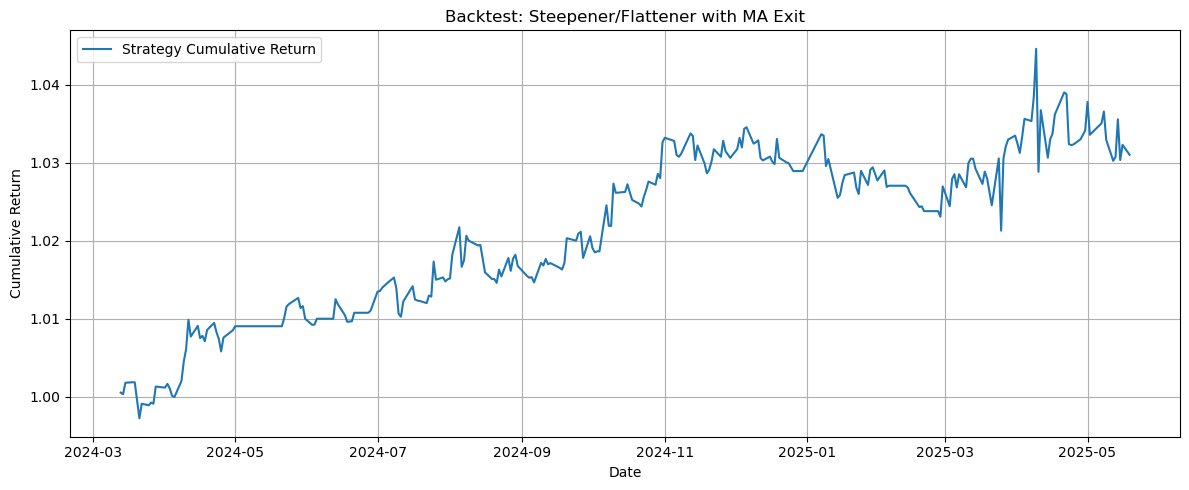

Total Return: 3.10%
Annualized Return: 0.20%


In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# 1. Fetch yield curve data for 5Y and 20Y (2020-2025)
def fetch_year_data(year):
    url = (
        "https://home.treasury.gov/resource-center/data-chart-center/"
        "interest-rates/TextView"
        f"?type=daily_treasury_yield_curve&field_tdr_date_value={year}"
    )
    resp = requests.get(url); resp.raise_for_status()
    soup = BeautifulSoup(resp.text, "html.parser")
    table = soup.find("table")
    headers = [th.get_text(strip=True) for th in table.find("thead").find_all("th")]
    rows = [
        [td.get_text(strip=True).replace('*','') for td in tr.find_all("td")]
        for tr in table.find("tbody").find_all("tr")
    ]
    df = pd.DataFrame(rows, columns=headers)
    df["Date"] = pd.to_datetime(df["Date"])
    df.set_index("Date", inplace=True)
    return df

years = [2025, 2024]
yc = pd.concat([fetch_year_data(y) for y in years]).sort_index()
yc = yc.rename(columns={'5 Yr':'Y5','20 Yr':'Y20'})
yc[['Y5','Y20']] = yc[['Y5','Y20']].apply(pd.to_numeric, errors='coerce')
yc = yc.dropna(subset=['Y5','Y20'])
yc['Slope'] = yc['Y20'] - yc['Y5']
yc['MA'] = yc['Slope'].rolling(50).mean()
yc['STD']= yc['Slope'].rolling(50).std()
k = 1.0
yc['Upper'] = yc['MA'] + k*yc['STD']
yc['Lower'] = yc['MA'] - k*yc['STD']

# 2. Fetch ETF prices from Stooq
start, end = "20240101", "20250520"
def fetch_stooq(sym):
    url = f"https://stooq.com/q/d/l/?s={sym}&d1={start}&d2={end}&i=d"
    df = pd.read_csv(StringIO(requests.get(url).text), parse_dates=['Date'], index_col='Date')
    return df['Close'].sort_index()

prices = pd.DataFrame({
    'Short': fetch_stooq("2856.jp"),
    'Long':  fetch_stooq("2621.jp")
}).dropna()

# 3. Calculate returns
rets = prices.pct_change().dropna()

# 4. Merge slope and returns
df = yc[['Slope','MA','Upper','Lower']].join(rets, how='inner').dropna()

# 5. Generate position based on entry/exit rules
position = 0
positions = []
for idx, row in df.iterrows():
    slope, ma, upper, lower = row['Slope'], row['MA'], row['Upper'], row['Lower']
    if position == 0:
        if slope > upper:
            position = 1  # enter steepener
        elif slope < lower:
            position = -1  # enter flattener
    elif position == 1:
        if slope <= ma:
            position = 0  # exit steepener
    elif position == -1:
        if slope >= ma:
            position = 0  # exit flattener
    positions.append(position)
df['Position'] = positions

# 6. Hedge ratio (duration short/duration long = 5/8)
hedge_ratio = 4.3/15.9

# 7. Strategy returns
df['StrategyRet'] = df['Position'] * (df['Short'] - hedge_ratio*df['Long'])
df['Cumulative'] = (1 + df['StrategyRet']).cumprod()

# 8. Plot results
plt.figure(figsize=(12,5))
plt.plot(df['Cumulative'], label='Strategy Cumulative Return')
plt.title('Backtest: Steepener/Flattener with MA Exit')
plt.xlabel('Date'); plt.ylabel('Cumulative Return')
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()

# 9. Performance metrics
total = df['Cumulative'].iloc[-1] - 1
annual = df['Cumulative'].resample('Y').last().pct_change().mean()
print(f"Total Return: {total:.2%}")
print(f"Annualized Return: {annual:.2%}")


In [14]:
df.tail(50)

,Slope,MA,Upper,Lower,Short,Long,Position,StrategyRet,Cumulative
Date,,,,,,,,,
2025-03-04,0.55,0.4652,0.505669,0.424731,0.005242,0.006832,1,0.003394,1.027887
2025-03-05,0.53,0.4680,0.508000,0.428000,-0.002607,-0.011874,1,0.000604,1.028508
2025-03-06,0.57,0.4710,0.512906,0.429094,-0.004211,-0.009442,1,-0.001658,1.026803
2025-03-07,0.57,0.4742,0.517441,0.430959,0.004229,0.009532,1,0.001651,1.028499
2025-03-10,0.60,0.4780,0.523759,0.432241,-0.003485,-0.006867,1,-0.001628,1.026824
2025-03-11,0.60,0.4818,0.529639,0.433961,0.005829,0.010372,1,0.003024,1.029930
2025-03-12,0.58,0.4846,0.534013,0.435187,-0.002463,-0.011121,1,0.000544,1.030490
2025-03-13,0.61,0.4874,0.539843,0.434957,-0.001162,-0.004325,1,0.000008,1.030498
2025-03-14,0.56,0.4890,0.542424,0.435576,-0.000291,0.003475,1,-0.001231,1.029230


In [7]:
df_raw.tail()

,基準日,1年,2年,3年,4年,5年,6年,7年,8年,9年,10年,15年,20年,25年,30年,40年
Date,,,,,,,,,,,,,,,,
2025-04-23,R7.4.23,0.55,0.684,0.74,0.824,0.906,0.933,0.993,1.092,1.212,1.34,1.91,2.232,2.456,2.626,2.888
2025-04-24,R7.4.24,0.542,0.679,0.723,0.806,0.884,0.916,0.975,1.074,1.199,1.328,1.878,2.226,2.443,2.634,2.906
2025-04-25,R7.4.25,0.545,0.689,0.734,0.820,0.903,0.934,0.998,1.097,1.219,1.347,1.906,2.248,2.473,2.639,2.937
2025-04-28,R7.4.28,0.548,0.686,0.729,0.817,0.898,0.920,0.980,1.078,1.201,1.329,1.891,2.236,2.466,2.639,2.938
2025-04-30,R7.4.30,0.551,0.676,0.72,0.808,0.888,0.920,0.980,1.079,1.202,1.33,1.891,2.228,2.473,2.645,2.936


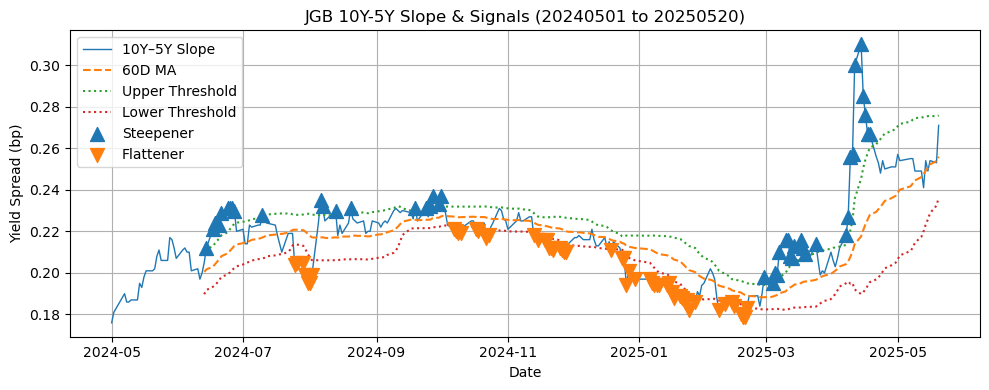

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

def fetch_jgb_yields(start, end, window=30):
# 主数据源
    url_main = "https://www.mof.go.jp/jgbs/reference/interest_rate/data/jgbcm_all.csv"
    # 补充源（最近利率）
    url_extra = "https://www.mof.go.jp/jgbs/reference/interest_rate/jgbcm.csv"
    

    def load_csv(url):
            resp = requests.get(url)
            resp.encoding = 'shift_jis'
            df = pd.read_csv(StringIO(resp.text), skiprows=1)
            
            # 转换日本年号到公元日期
            def to_greg(s):
                if not isinstance(s, str):
                    return pd.NaT
                m = re.match(r'([SRH])(\d+)\.(\d+)\.(\d+)', s)
                if not m:
                    return pd.NaT
                era, y, mo, d = m.groups()
                base = {'S':1926, 'H':1989, 'R':2019}[era]
                return datetime(base + int(y) - 1, int(mo), int(d))
            
            # 应用日期转换，并设置为索引
            df['Date'] = df.iloc[:, 0].map(to_greg)
            df.set_index('Date', inplace=True)
            df.index = df.index.normalize()
            df = df[~df.index.isna()]
            return df

    # 加载、合并、去重
    df_main  = load_csv(url_main)
    df_extra = load_csv(url_extra)
    df_raw = pd.concat([df_main, df_extra])
    df_raw = df_raw[~df_raw.index.duplicated(keep='last')]

    # ✅ 排序索引，保证单调递增
    df_raw = df_raw.sort_index()
    
    # 按日期切片
    df_period = df_raw.loc[start:end]
    df_clean  = df_period.rename(columns={'8年':'Y8', '10年':'Y10'})[['Y8','Y10']].astype(float).dropna()
    
    # 计算指标
    df_clean['Slope'] = df_clean['Y10'] - df_clean['Y8']
    df_clean['MA']    = df_clean['Slope'].rolling(window).mean()
    df_clean['STD']   = df_clean['Slope'].rolling(window).std()
    df_clean['Upper'] = df_clean['MA'] + df_clean['STD']
    df_clean['Lower'] = df_clean['MA'] - df_clean['STD']
    df_clean['Signal']= 0
    df_clean.loc[df_clean['Slope'] > df_clean['Upper'], 'Signal'] = 1
    df_clean.loc[df_clean['Slope'] < df_clean['Lower'], 'Signal'] = -1
    
    return df_clean

# 使用示例
start_date, end_date = '20240501', '20250520'
df = fetch_jgb_yields(start_date, end_date, window=30)

# --- 5. 可视化并标记信号 ---
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['Slope'], label='10Y–5Y Slope', linewidth=1)
plt.plot(df.index, df['MA'], linestyle='--', label='30D MA')
plt.plot(df.index, df['Upper'], linestyle=':', label='Upper Threshold')
plt.plot(df.index, df['Lower'], linestyle=':', label='Lower Threshold')

# 标记策略信号：1=Steepener, -1=Flattener
steep_dates = df[df['Signal'] == 1].index
flat_dates  = df[df['Signal'] == -1].index
plt.scatter(steep_dates, df.loc[steep_dates, 'Slope'], marker='^', s=100, label='Steepener', zorder=5)
plt.scatter(flat_dates, df.loc[flat_dates, 'Slope'],   marker='v', s=100, label='Flattener',  zorder=5)

plt.title(f'JGB 10Y-5Y Slope & Signals ({start_date} to {end_date})')
plt.xlabel('Date')
plt.ylabel('Yield Spread (bp)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
df_raw.tail() 

,基準日,1年,2年,3年,4年,5年,6年,7年,8年,9年,10年,15年,20年,25年,30年,40年
Date,,,,,,,,,,,,,,,,
2025-05-19,R7.5.19,0.571,0.718,0.798,0.912,1.007,1.059,1.132,1.241,1.373,1.494,2.066,2.412,2.678,2.851,3.178
2025-05-20,R7.5.20,0.583,0.728,0.807,0.922,1.018,1.071,1.143,1.259,1.397,1.53,2.138,2.539,2.796,2.969,3.288
2025-05-21,R7.5.21,0.558,0.72,0.798,0.917,1.008,1.070,1.144,1.259,1.397,1.53,2.138,2.528,2.799,2.976,3.3
2025-05-22,R7.5.22,0.56,0.737,0.816,0.939,1.045,1.104,1.197,1.308,1.439,1.573,2.179,2.566,2.823,2.999,3.336
NaT,※最新のcsvデータがダウンロードできない場合、ご利用のブラウザにおいてキャッシュの削除を実...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
import requests
import re
from io import StringIO
import pandas as pd
from datetime import datetime
def fetch_jgb_yields(start, end, window=30):
# 主数据源
    url_main = "https://www.mof.go.jp/jgbs/reference/interest_rate/data/jgbcm_all.csv"
    # 补充源（最近利率）
    url_extra = "https://www.mof.go.jp/jgbs/reference/interest_rate/jgbcm.csv"
    

    def load_csv(url):
            resp = requests.get(url)
            resp.encoding = 'shift_jis'
            df = pd.read_csv(StringIO(resp.text), skiprows=1)
            
            # 转换日本年号到公元日期
            def to_greg(s):
                if not isinstance(s, str):
                    return pd.NaT
                m = re.match(r'([SRH])(\d+)\.(\d+)\.(\d+)', s)
                if not m:
                    return pd.NaT
                era, y, mo, d = m.groups()
                base = {'S':1926, 'H':1989, 'R':2019}[era]
                return datetime(base + int(y) - 1, int(mo), int(d))
            
            # 应用日期转换，并设置为索引
            df['Date'] = df.iloc[:, 0].map(to_greg)
            df.set_index('Date', inplace=True)
            df.index = df.index.normalize()
            df = df[~df.index.isna()]
            return df

    # 加载、合并、去重
    df_main  = load_csv(url_main)
    df_extra = load_csv(url_extra)
    df_raw = pd.concat([df_main, df_extra])
    df_raw = df_raw[~df_raw.index.duplicated(keep='last')]

    # ✅ 排序索引，保证单调递增
    df_raw = df_raw.sort_index()
    
    # 按日期切片
    df_period = df_raw.loc[start:end]
    df_clean  = df_period.rename(columns={'8年':'Y8', '10年':'Y10'})[['Y8','Y10']].astype(float).dropna()
    
    # 计算指标
    df_clean['Slope'] = df_clean['Y10'] - df_clean['Y8']
    df_clean['MA']    = df_clean['Slope'].rolling(window).mean()
    df_clean['STD']   = df_clean['Slope'].rolling(window).std()
    df_clean['Upper'] = df_clean['MA'] + df_clean['STD']
    df_clean['Lower'] = df_clean['MA'] - df_clean['STD']
    df_clean['Signal']= 0
    df_clean.loc[df_clean['Slope'] > df_clean['Upper'], 'Signal'] = 1
    df_clean.loc[df_clean['Slope'] < df_clean['Lower'], 'Signal'] = -1
    
    return df_clean

# 使用示例
start_date, end_date = '20240501', '20250520'
df = fetch_jgb_yields(start_date, end_date, window=30)
print(df.head())

               Y8    Y10  Slope  MA  STD  Upper  Lower  Signal
Date                                                          
2024-05-01  0.722  0.898  0.176 NaN  NaN    NaN    NaN       0
2024-05-02  0.727  0.908  0.181 NaN  NaN    NaN    NaN       0
2024-05-07  0.691  0.881  0.190 NaN  NaN    NaN    NaN       0
2024-05-08  0.701  0.887  0.186 NaN  NaN    NaN    NaN       0
2024-05-09  0.730  0.916  0.186 NaN  NaN    NaN    NaN       0


In [18]:

# --- Module 1: Data Loading ---
def fetch_jgb_yields(start, end, window=30):
# 主数据源
    url_main = "https://www.mof.go.jp/jgbs/reference/interest_rate/data/jgbcm_all.csv"
    # 补充源（最近利率）
    url_extra = "https://www.mof.go.jp/jgbs/reference/interest_rate/jgbcm.csv"
    

    def load_csv(url):
            resp = requests.get(url)
            resp.encoding = 'shift_jis'
            df = pd.read_csv(StringIO(resp.text), skiprows=1)
            
            # 转换日本年号到公元日期
            def to_greg(s):
                if not isinstance(s, str):
                    return pd.NaT
                m = re.match(r'([SRH])(\d+)\.(\d+)\.(\d+)', s)
                if not m:
                    return pd.NaT
                era, y, mo, d = m.groups()
                base = {'S':1926, 'H':1989, 'R':2019}[era]
                return datetime(base + int(y) - 1, int(mo), int(d))
            
            # 应用日期转换，并设置为索引
            df['Date'] = df.iloc[:, 0].map(to_greg)
            df.set_index('Date', inplace=True)
            df.index = df.index.normalize()
            df = df[~df.index.isna()]
            return df

    # 加载、合并、去重
    df_main  = load_csv(url_main)
    df_extra = load_csv(url_extra)
    df_raw = pd.concat([df_main, df_extra])
    df_raw = df_raw[~df_raw.index.duplicated(keep='last')]

    # ✅ 排序索引，保证单调递增
    df_raw = df_raw.sort_index()
    
    # 按日期切片
    df_period = df_raw.loc[start:end]
    df_clean  = df_period.rename(columns={'8年':'Y8', '10年':'Y10'})[['Y8','Y10']].astype(float).dropna()
    
    # 计算指标
    df_clean['Slope'] = df_clean['Y10'] - df_clean['Y8']
    df_clean['MA']    = df_clean['Slope'].rolling(window).mean()
    df_clean['STD']   = df_clean['Slope'].rolling(window).std()
    df_clean['Upper'] = df_clean['MA'] + df_clean['STD']
    df_clean['Lower'] = df_clean['MA'] - df_clean['STD']
    df_clean['Signal']= 0
    df_clean.loc[df_clean['Slope'] > df_clean['Upper'], 'Signal'] = 1
    df_clean.loc[df_clean['Slope'] < df_clean['Lower'], 'Signal'] = -1
    
    return df_clean

def fetch_etf_prices(symbols, start, end):
    """
    从 Stooq 拉取 ETF 收盘价，返回 DataFrame
    """
    def fetch(sym):
        url = f"https://stooq.com/q/d/l/?s={sym}&d1={start}&d2={end}&i=d"
        tmp = pd.read_csv(StringIO(requests.get(url).text),
                          parse_dates=['Date'], index_col='Date')
        return tmp['Close'].sort_index()
    prices = pd.DataFrame({name: fetch(sym) for name, sym in symbols.items()})
    prices.index = prices.index.normalize()
    return prices.loc[start:end].dropna()

# --- Module 2: Strategy & Backtest ---
def run_backtest(signals, prices, durations):
    """
    signals: DataFrame with 'Signal' column
    prices: DataFrame with 'Short','Long' price columns
    durations: dict {'Short':dur_short,'Long':dur_long}
    返回 backtest DataFrame 包含 Position, StrategyRet, Cumulative
    """
    df = signals.copy()
    df['Position'] = df['Signal'].shift(1).fillna(0)
    returns = prices.pct_change().dropna()
    bt = df[['Position']].join(returns, how='inner').dropna()
    hedge = durations['Short'] / durations['Long']
    bt['StrategyRet'] = bt['Position'] * (bt['Short'] - hedge * bt['Long'])
    bt['Cumulative'] = (1 + bt['StrategyRet']).cumprod()
    return bt

# --- Module 3: Visualization ---
def plot_results(bt, output_csv=None):
    """
    在净值曲线上标记 Steepener/Flattener 进入与退出
    """
    df = bt.copy()
    df['PrevPos'] = df['Position'].shift(1).fillna(0)

    # Identify entry and exit points
    entries_steep = df[(df['PrevPos']==0) & (df['Position']==1)]
    entries_flat  = df[(df['PrevPos']==0) & (df['Position']==-1)]
    exits         = df[(df['PrevPos']!=0) & (df['Position']==0)]

    # Calculate total PnL and cumulative return
    total_pnl = df['StrategyRet'].sum()
    cumulative_return_pct = (df['Cumulative'].iloc[-1] - 1) * 100

    # Plot equity curve and markers
    plt.figure(figsize=(12,6))
    plt.plot(df.index, df['Cumulative'], label='Equity Curve', color='blue')
    plt.scatter(entries_steep.index, entries_steep['Cumulative'],
                marker='^', color='green', s=80, label='Entry Steepener')
    plt.scatter(entries_flat.index, entries_flat['Cumulative'],
                marker='^', color='red', s=80, label='Entry Flattener')
    plt.scatter(exits.index, exits['Cumulative'],
                marker='v', color='gray', s=80, label='Exit')

    # Annotation box at top-right
    plt.text(0.75, 0.95,
             f"Total PnL: {total_pnl:.4f}\n"
             f"Cumulative Return: {cumulative_return_pct:.2f}%",
             transform=plt.gca().transAxes,
             fontsize=12,
             verticalalignment='top',
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

    plt.title('Strategy Equity with Entry/Exit Points')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Equity')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Prepare daily PnL table
    pnl_table = df[['Position', 'StrategyRet']].copy()
    pnl_table['StrategyRet'] = pnl_table['StrategyRet'].round(6)

    # Output or save
    if output_csv:
        pnl_table.to_csv(output_csv, float_format='%.6f')
        print(f"Daily PnL saved to {output_csv}")
    else:
        print("Daily PnL:")
        #print(pnl_table)
        print("cumulative return is:",cumulative_return_pct)

# --- Main Execution ---
if __name__ == "__main__":
    start_date, end_date = '20240501', '20250520'
    # 1. JGB 斜率信号
    #signals = fetch_jgb_yields(start_date, end_date, window=30)
    # 2. ETF 价格
    #symbols = {'Short':'236a.jp', 'Long':'2561.jp'}
    #prices = fetch_etf_prices(symbols, start_date, end_date)
    # 3. 回测
    #durations = {'Short': 8.2, 'Long': 10.85}
    #bt = run_backtest(signals, prices, durations)
    # 4. 可视化
    #plot_results(bt, output_csv=None)



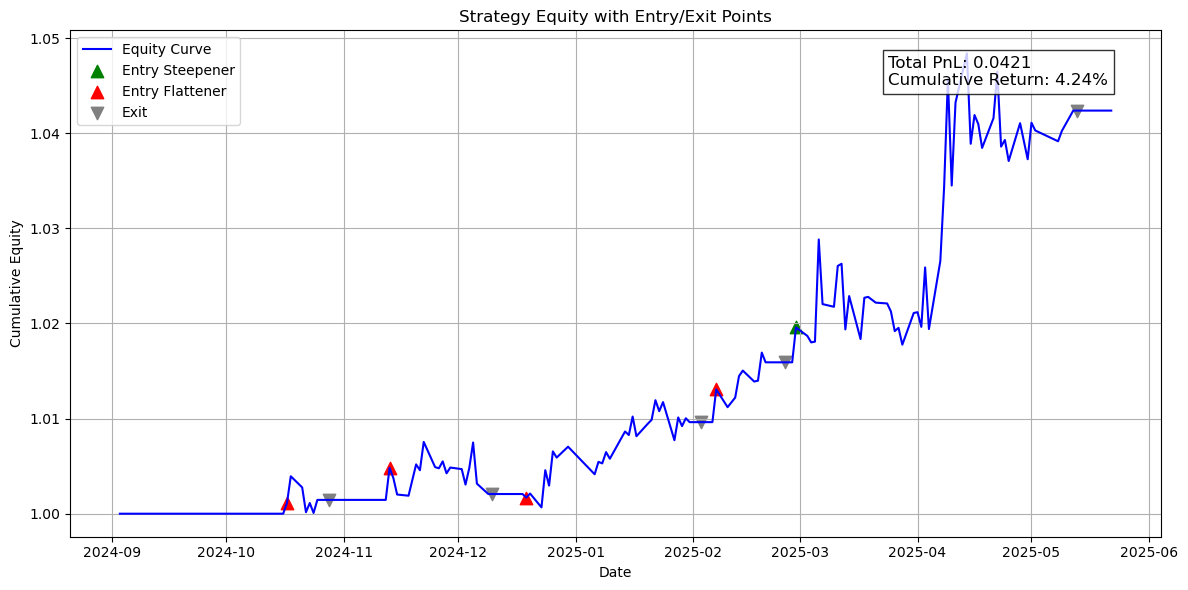

Daily PnL:
cumulative return is: 4.238357835446993


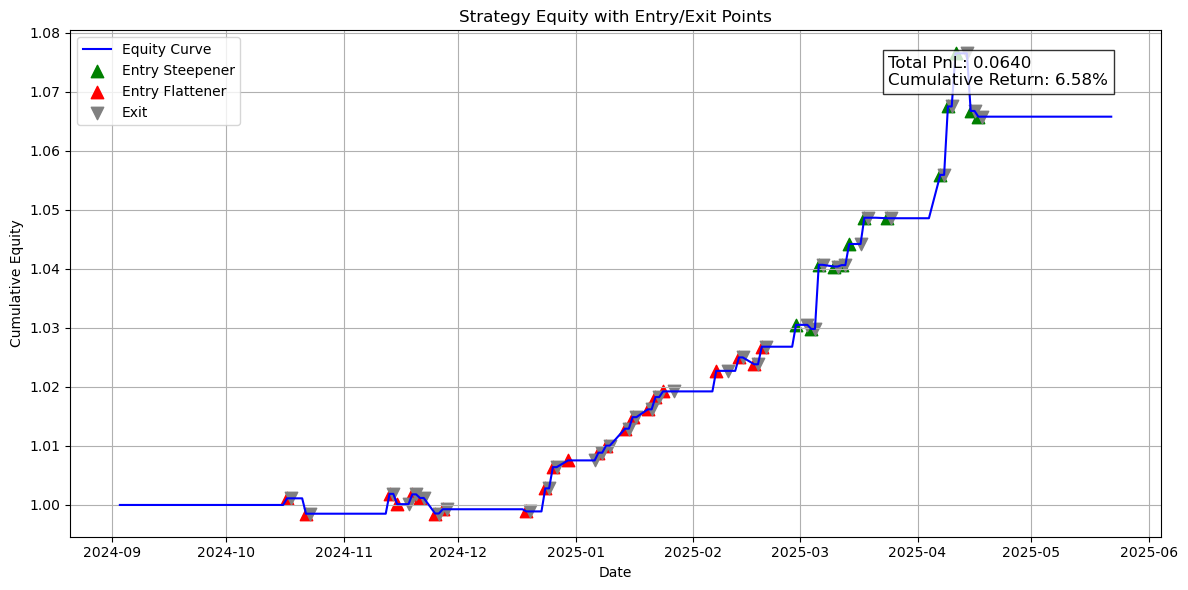

Daily PnL:
cumulative return is: 6.58128592538012


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------
# run_backtest 主框架
# ---------------------------
def run_backtest(signals: pd.DataFrame, prices: pd.DataFrame, durations: dict, position_fn) -> pd.DataFrame:
    """
    signals: 包含 ['Slope','MA','Signal'] 的 DataFrame
    prices: 包含 ['Short','Long'] 收盘价的 DataFrame
    durations: {'Short': 短端久期, 'Long': 长端久期}
    position_fn: 持仓逻辑函数(signals, prices) -> pd.Series(Position)
    """
    df = signals.copy()
    # ===== 在此调用不同策略的持仓逻辑 =====
    df['Position'] = position_fn(signals, prices)  # <-- 在这里根据不同策略函数生成 Position
    # ====================================
    rets = prices.pct_change().dropna()
    bt = df[['Position']].join(rets, how='inner').dropna()
    hedge = durations['Short'] / durations['Long']
    bt['StrategyRet'] = bt['Position'] * (bt['Short'] - hedge * bt['Long'])
    bt['Cumulative']  = (1 + bt['StrategyRet']).cumprod()
    return bt

# ---------------------------
# 策略1：信号入场，触及MA平仓，等待下一次信号
# ---------------------------
def strat1(signals: pd.DataFrame, prices: pd.DataFrame) -> pd.Series:
    pos = 0
    positions = []
    for idx, row in signals.iterrows():
        sig = row['Signal']
        slope, ma = row['Slope'], row['MA']
        if pos == 0:
            if sig != 0:        # 出现陡峭/平坦信号时开仓
                pos = sig
        else:
            # Steepener持仓且斜率跌回MA及以下时平仓；Flattener持仓且斜率回到MA及以上时平仓
            if (pos == 1 and slope <= ma) or (pos == -1 and slope >= ma):
                pos = 0
        positions.append(pos)
    return pd.Series(positions, index=signals.index)

# ---------------------------
# 策略2：信号入场，触及MA直接反向开仓，等待下一次信号
# ---------------------------
def strat2(signals: pd.DataFrame, prices: pd.DataFrame) -> pd.Series:
    pos = 0
    positions = []
    for idx, row in signals.iterrows():
        sig = row['Signal']
        slope, ma = row['Slope'], row['MA']
        if pos == 0 and sig != 0:
            pos = sig          # 初次信号入场
        elif pos == 1 and slope <= ma:
            pos = -1           # Steepener触及MA时反向做Flattener
        elif pos == -1 and slope >= ma:
            pos = 1            # Flattener触及MA时反向做Steepener
        positions.append(pos)
    return pd.Series(positions, index=signals.index)

# ---------------------------
# 策略3：信号入场，不在MA平仓，仅在出现反向信号时转换
# ---------------------------
def strat3(signals: pd.DataFrame, prices: pd.DataFrame) -> pd.Series:
    pos = 0
    positions = []
    for idx, row in signals.iterrows():
        sig = row['Signal']
        if pos == 0 and sig != 0:
            pos = sig          # 初次信号入场
        elif pos != 0 and sig == -pos:
            pos = sig          # 出现相反信号时转换仓位
        positions.append(pos)
    return pd.Series(positions, index=signals.index)

# ---------------------------
# 策略4：策略1基础上加止损，跌破止损比例平仓
# ---------------------------
def strat4(signals: pd.DataFrame, prices: pd.DataFrame, durations: dict, stop_loss=0.01) -> pd.Series:
    pos = 0
    entry_value = 0.0
    hedge = durations['Short'] / durations['Long']
    positions = []

    for current_date in signals.index:
        sig   = signals.at[current_date, 'Signal']
        slope = signals.at[current_date, 'Slope']
        ma    = signals.at[current_date, 'MA']

        if current_date in prices.index:
            short_p = prices.at[current_date, 'Short']
            long_p  = prices.at[current_date, 'Long']
            value   = short_p - hedge * long_p
        else:
            positions.append(pos)
            continue

        if pos == 0:
            if sig != 0:
                pos = sig
                entry_value = value
        else:
            if (pos == 1 and slope <= ma) or \
               (pos == -1 and slope >= ma) or \
               (value < entry_value * (1 - stop_loss)):
                pos = 0

        positions.append(pos)

    return pd.Series(positions, index=signals.index)


# ---------------------------
# 主流程示例
# ---------------------------
if __name__ == "__main__":
    # 假设已用 fetch_jgb_yields 和 fetch_etf_prices 得到 signals 和 prices
    
    start_date, end_date = '20240901', '20250522'
    # 1. JGB 斜率信号
    signals = fetch_jgb_yields(start_date, end_date, window=30)
    # 2. ETF 价格
    symbols = {'Short':'236a.jp', 'Long':'2561.jp'}
    prices = fetch_etf_prices(symbols, start_date, end_date)
    durations = {'Short':8.2, 'Long':10.85}

    # 选择策略
    bt1 = run_backtest(signals, prices, durations, strat1)
    #bt2 = run_backtest(signals, prices, durations, strat2)
    #bt3 = run_backtest(signals, prices, durations, strat3)
    # strat4 需要额外传入 durations
    bt4 = run_backtest(signals, prices, durations, lambda s,p: strat4(s, p, durations, stop_loss=0.10))

    # 可视化或输出绩效
    plot_results(bt1, output_csv=None)
    #plot_results(bt2, output_csv=None)
    #plot_results(bt3, output_csv=None)
    plot_results(bt4)



In [21]:
bt4

,Position,Short,Long,StrategyRet,Cumulative
Date,,,,,
2024-09-03,0,-0.001602,-0.002112,-0.0,1.000000
2024-09-04,0,0.002406,0.003387,-0.0,1.000000
2024-09-05,0,0.000600,0.002110,-0.0,1.000000
2024-09-06,0,0.002199,0.002947,-0.0,1.000000
2024-09-09,0,-0.002793,-0.003359,-0.0,1.000000
...,...,...,...,...,...
2025-05-14,0,0.000207,0.007685,-0.0,1.065813
2025-05-15,0,-0.001659,0.003589,-0.0,1.065813
2025-05-16,0,-0.000208,-0.008494,0.0,1.065813


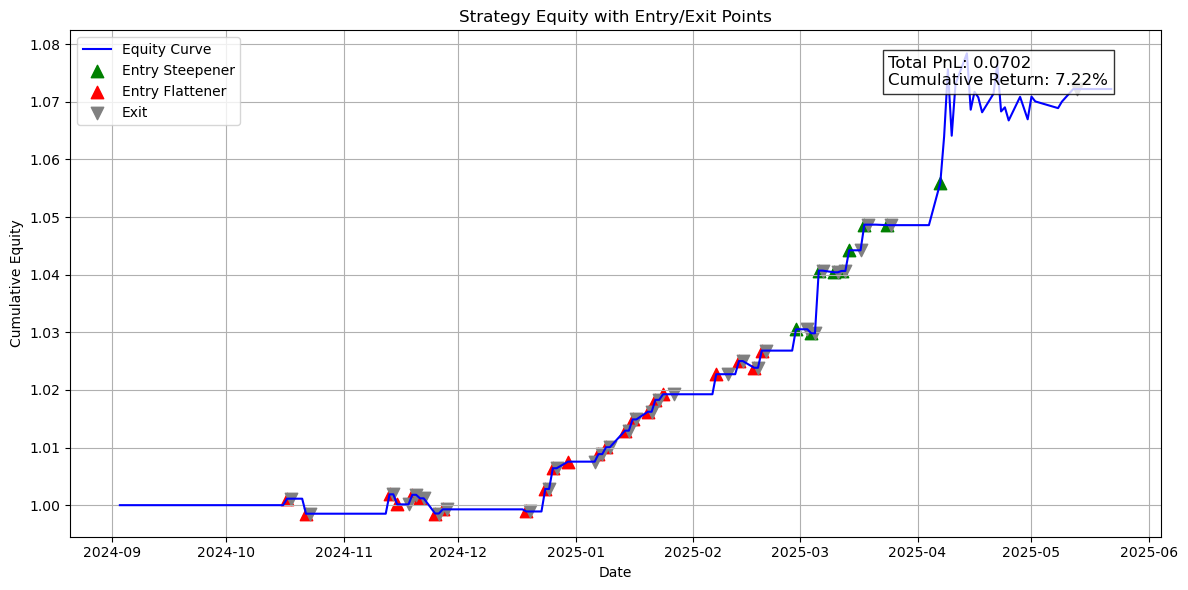

Daily PnL:
cumulative return is: 7.222380280331664


In [27]:

def strat1_with_stop(signals: pd.DataFrame,
                     prices: pd.DataFrame,
                     durations: dict,
                     stop_loss: float = 0.02) -> pd.Series:
    """
    策略1 + 止损：
      - 当 Signal 由 0→±1 时入场，记录 entry_val（组合价值）
      - 持仓后在以下任一条件下平仓：
        1) 触及 MA（斜率回归至均线）
        2) 触发止损（当前价值 < entry_val * (1 - stop_loss)）
    """
    pos = 0
    entry_val = 0.0
    # 对冲比例 = 短端久期 / 长端久期
    hedge = durations['Short'] / durations['Long']
    positions = []

    for dt, row in signals.iterrows():
        sig   = row['Signal']
        slope = row['Slope']
        ma    = row['MA']

        # 计算当日组合价值
        if dt in prices.index:
            value = prices.at[dt, 'Short'] - hedge * prices.at[dt, 'Long']
        else:
            positions.append(pos)
            continue

        if pos == 0:
            # 空仓时：出现信号即入场，并记录入场价值
            if sig != 0:
                pos = sig
                entry_val = value
        else:
            # 已有持仓：当触及 MA 或 触发止损时平仓
            if ((pos == 1 and slope <= ma) or
                (pos == -1 and slope >= ma) or
                (value < entry_val * (1 - stop_loss))):
                pos = 0

        positions.append(pos)

    return pd.Series(positions, index=signals.index)

bt6 = run_backtest(signals, prices, durations,lambda s, p: strat1_with_stop(s, p, durations, stop_loss=0.02))
plot_results(bt6)

In [43]:
def strat1_with_stop_debug(signals, prices, durations, stop_loss=0.02):
    pos = 0
    entry_val = 0.0
    hedge = durations['Short']/durations['Long']
    for dt, row in signals.iterrows():
        sig, slope, ma = row['Signal'], row['Slope'], row['MA']
        if dt in prices.index:
            value = prices.at[dt,'Short'] - hedge*prices.at[dt,'Long']
        else:
            continue

        if pos == 0:
            if sig != 0:
                pos = sig
                entry_val = value
                print(f"{dt} 入场，entry_val={entry_val:.6f}")
        else:
            # 判断MA平仓
            if pos==1 and slope <= ma:
                print(f"{dt} 平仓(斜率回落): slope={slope:.6f}, ma={ma:.6f}")
                pos = 0
            # 判断止损
            elif value < entry_val*(1-stop_loss):
                print(f"{dt} 平仓(止损): value={value:.6f}, 阈值={entry_val*(1-stop_loss):.6f}")
                pos = 0

bt_t = run_backtest(signals, prices, durations,lambda s, p: strat1_with_stop_debug(s, p, durations, stop_loss=0.02))
plot_results(bt_t)

2024-10-17 00:00:00 入场，entry_val=-1278.548387
2024-10-18 00:00:00 平仓(止损): value=-1282.927189, 阈值=-1252.977419
2024-10-22 00:00:00 入场，entry_val=-1273.302304
2024-10-23 00:00:00 平仓(止损): value=-1275.569585, 阈值=-1247.836258
2024-11-13 00:00:00 入场，entry_val=-1270.767742
2024-11-14 00:00:00 平仓(止损): value=-1263.098618, 阈值=-1245.352387
2024-11-15 00:00:00 入场，entry_val=-1261.642857
2024-11-18 00:00:00 平仓(止损): value=-1260.987097, 阈值=-1236.410000
2024-11-19 00:00:00 入场，entry_val=-1262.998618
2024-11-20 00:00:00 平仓(止损): value=-1266.777419, 阈值=-1237.738645
2024-11-21 00:00:00 入场，entry_val=-1263.498618
2024-11-22 00:00:00 平仓(止损): value=-1268.533180, 阈值=-1238.228645
2024-11-25 00:00:00 入场，entry_val=-1267.233180
2024-11-26 00:00:00 平仓(止损): value=-1269.556221, 阈值=-1241.888516
2024-11-27 00:00:00 入场，entry_val=-1267.533180
2024-11-28 00:00:00 平仓(止损): value=-1268.700461, 阈值=-1242.182516
2024-12-19 00:00:00 入场，entry_val=-1265.265899
2024-12-20 00:00:00 平仓(止损): value=-1271.423502, 阈值=-1239.960581
2024-12-24

IndexError: single positional indexer is out-of-bounds

In [30]:
bt6.tail(50)

,Position,Short,Long,StrategyRet,Cumulative
Date,,,,,
2025-03-10,1.0,-0.003976,-0.004895,-0.000276,1.040416
2025-03-11,0.0,0.004202,0.000000,0.000000,1.040416
2025-03-12,1.0,-0.001464,-0.002236,0.000226,1.040651
2025-03-13,0.0,-0.000629,0.008068,-0.000000,1.040651
2025-03-14,1.0,0.002096,-0.001779,0.003441,1.044232
2025-03-17,0.0,0.000628,0.006682,-0.000000,1.044232
2025-03-18,1.0,-0.000418,-0.006195,0.004264,1.048684
2025-03-19,0.0,-0.001255,-0.001781,0.000000,1.048684
2025-03-21,0.0,0.000419,0.001338,-0.000000,1.048684



Stop-loss Scan Results:
 stop_loss  total_return  max_drawdown  win_rate  pl_ratio
     0.005      0.058013     -0.010796      0.04 18.328408
     0.010      0.066965     -0.010796      0.00       NaN
     0.015      0.066965     -0.010796      0.00       NaN
     0.020      0.066965     -0.010796      0.00       NaN
     0.025      0.066965     -0.010796      0.00       NaN
     0.030      0.066965     -0.010796      0.00       NaN
     0.035      0.065813     -0.009970      0.00       NaN
     0.040      0.065813     -0.009970      0.00       NaN
     0.045      0.065813     -0.009970      0.00       NaN
     0.050      0.065813     -0.009970      0.00       NaN


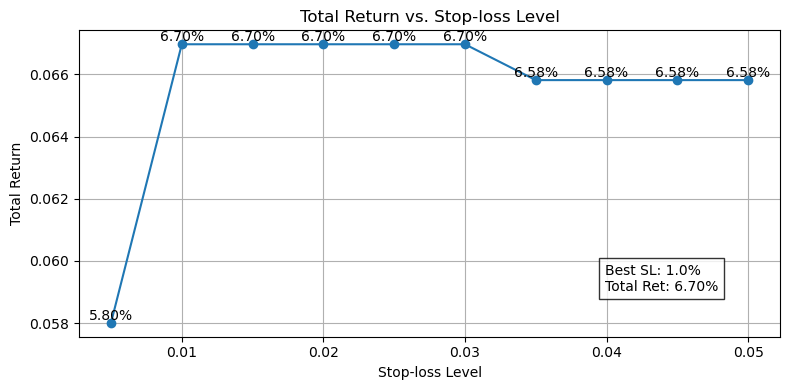

In [ ]:


# --- 1. 基本配置 ---
start, end = '2024-09-01', '2025-05-20'
symbols   = {'Short':'236a.jp', 'Long':'2561.jp'}
durations = {'Short':8.2, 'Long':10.85}

# 拉信号和价格
signals = fetch_jgb_yields(start, end, window=30)
prices  = fetch_etf_prices(symbols, start.replace('-',''), end.replace('-',''))

# --- 2. 参数扫描 ---
results = []
for sl in np.arange(0.005, 0.051, 0.005):
    # 用 strat4，这里需要把 strat4 包装成 position_fn
    position_fn = lambda s,p,sl=sl: strat4(s, p, durations, stop_loss=sl)
    bt = run_backtest(signals, prices, durations, position_fn)

    # 计算指标
    total_ret = bt['Cumulative'].iloc[-1] - 1
    mdd       = max_drawdown(bt['Cumulative'])
    win_rate, pl_ratio = analyze_trades(bt)

    results.append({
        'stop_loss':   sl,
        'total_return':total_ret,
        'max_drawdown':mdd,
        'win_rate':    win_rate,
        'pl_ratio':    pl_ratio
    })

res_df = pd.DataFrame(results)

# --- 3. 输出表格 ---
print("\nStop-loss Scan Results:")
print(res_df.to_string(index=False))

# --- 4. 可视化：Total Return vs Stop-loss Level ---
plt.figure(figsize=(8,4))
plt.plot(res_df['stop_loss'], res_df['total_return'], marker='o', linestyle='-')
for sl, tr in zip(res_df['stop_loss'], res_df['total_return']):
    plt.text(sl, tr, f"{tr:.2%}", ha='center', va='bottom')

best = res_df.loc[res_df['total_return'].idxmax()]
plt.text(0.75, 0.15,
         f"Best SL: {best.stop_loss:.1%}\nTotal Ret: {best.total_return:.2%}",
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

plt.title('Total Return vs. Stop-loss Level')
plt.xlabel('Stop-loss Level')
plt.ylabel('Total Return')
plt.grid(True)
plt.tight_layout()
plt.show()


In [31]:
def extract_trades(bt: pd.DataFrame) -> pd.DataFrame:
    """
    通过累加 StrategyRet 计算每笔交易的真实收益率：
      entry_date, exit_date, return, win (1=盈利, 0=亏损)
    bt: 包含 ['Position','StrategyRet'] 的 DataFrame
    """
    trades = []
    pos = 0
    entry_date = None

    # 遍历每一天
    for date, row in bt.iterrows():
        # 开仓
        if pos == 0 and row['Position'] != 0:
            pos = row['Position']
            entry_date = date

        # 平仓
        elif pos != 0 and row['Position'] == 0:
            exit_date = date
            # 真实回报 = 这笔交易期间 StrategyRet 的累积乘积减 1
            period = bt.loc[entry_date:exit_date, 'StrategyRet'] + 1
            ret = period.prod() - 1
            trades.append({
                'entry_date': entry_date,
                'exit_date':  exit_date,
                'return':     ret,
                'win':        int(ret > 0)
            })
            pos = 0
            entry_date = None

    # 期末强制平仓
    if pos != 0 and entry_date is not None:
        exit_date = bt.index[-1]
        period = bt.loc[entry_date:exit_date, 'StrategyRet'] + 1
        ret = period.prod() - 1
        trades.append({
            'entry_date': entry_date,
            'exit_date':  exit_date,
            'return':     ret,
            'win':        int(ret > 0)
        })

    return pd.DataFrame(trades)

# —— 使用示例 ——  
trade_df = extract_trades(bt6)  
print("交易明细：")  
print(trade_df.to_string(index=False))  
win_rate = trade_df['win'].mean()  
print(f"\n重新计算胜率：{win_rate:.2%}")  
# 计算盈亏比（平均盈利 / 平均亏损）  
wins    = trade_df.loc[trade_df['win']==1, 'return']  
losses  = trade_df.loc[trade_df['win']==0, 'return']  
# 如果没有亏损或没有盈利，要做边界处理  
if not wins.empty and not losses.empty:  
    pl_ratio = wins.mean() / -losses.mean()  
elif wins.empty:  
    pl_ratio = 0.0  
else:  
    pl_ratio = float('inf')

print(f"Win Rate:    {win_rate:.2%}")  
print(f"P/L Ratio:   {pl_ratio:.2f}")  


交易明细：
entry_date  exit_date    return  win
2024-10-17 2024-10-18  0.001122    1
2024-10-22 2024-10-23 -0.002603    0
2024-11-13 2024-11-14  0.003369    1
2024-11-15 2024-11-18 -0.001740    0
2024-11-19 2024-11-20  0.001660    1
2024-11-21 2024-11-22 -0.000611    0
2024-11-25 2024-11-26 -0.002632    0
2024-11-27 2024-11-28  0.000722    1
2024-12-19 2024-12-20 -0.000366    0
2024-12-24 2024-12-25  0.003911    1
2024-12-26 2024-12-27  0.003586    1
2024-12-30 2025-01-06  0.001135    1
2025-01-07 2025-01-08  0.001300    1
2025-01-09 2025-01-10  0.001180    1
2025-01-14 2025-01-15  0.002849    1
2025-01-16 2025-01-17  0.001928    1
2025-01-20 2025-01-21  0.001308    1
2025-01-22 2025-01-23  0.002042    1
2025-01-24 2025-01-27  0.000946    1
2025-02-07 2025-02-10  0.003414    1
2025-02-13 2025-02-14  0.002229    1
2025-02-17 2025-02-18 -0.001135    0
2025-02-19 2025-02-20  0.002909    1
2025-02-28 2025-03-03  0.003606    1
2025-03-04 2025-03-05 -0.000667    0
2025-03-06 2025-03-07  0.010551 

In [15]:
trade_df

,entry_date,exit_date,return,win
0,2024-10-17,2024-10-18,0.001122,1
1,2024-10-22,2024-10-23,-0.002603,0
2,2024-11-13,2024-11-14,0.003369,1
3,2024-11-15,2024-11-18,-0.001740,0
4,2024-11-19,2024-11-20,0.001660,1
5,2024-11-21,2024-11-22,-0.000611,0
6,2024-11-25,2024-11-26,-0.002632,0
7,2024-11-27,2024-11-28,0.000722,1
8,2024-12-19,2024-12-20,-0.000366,0
9,2024-12-24,2024-12-25,0.003911,1


In [14]:
bt.head(50)

,Position,Short,Long,StrategyRet,Cumulative
Date,,,,,
2024-09-03,0,-0.001602,-0.002112,-0.000000,1.000000
2024-09-04,0,0.002406,0.003387,-0.000000,1.000000
2024-09-05,0,0.000600,0.002110,-0.000000,1.000000
2024-09-06,0,0.002199,0.002947,-0.000000,1.000000
2024-09-09,0,-0.002793,-0.003359,-0.000000,1.000000
2024-09-10,0,-0.000200,-0.001685,0.000000,1.000000
2024-09-11,0,0.003601,0.002954,0.000000,1.000000
2024-09-12,0,-0.000399,0.000841,-0.000000,1.000000
2024-09-13,0,0.000798,0.002942,-0.000000,1.000000
